In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 200

x1 = np.random.normal(10, 3, n)
x2 = np.random.normal(4, 1, n)
x3 = np.random.normal(7, 1.5, n)


epsilon = np.random.normal(0, 2, n)

y = 3 + 0.8*x1 + 1.5*x2 + 0.4*x3 + epsilon

df = pd.DataFrame({
    "study_hours": x1,
    "lectures": x2,
    "sleep_hours": x3,
    "score": y
})

df.head().round(2)

,study_hours,lectures,sleep_hours,score
0,11.49,4.36,4.61,22.09
1,9.59,4.56,6.10,18.11
2,11.94,5.08,7.01,24.72
3,14.57,5.05,7.07,27.78
4,9.30,2.62,6.32,17.73


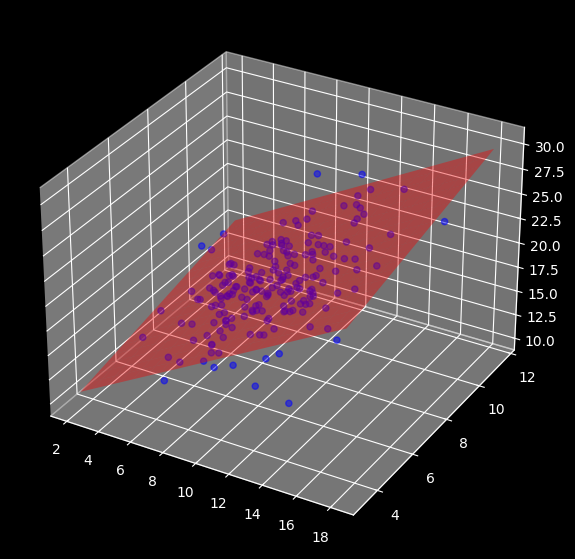

In [ ]:
X1 = df['study_hours'].values
X2 = df['sleep_hours'].values
y = df['score'].values

A = np.column_stack([np.ones_like(X1), X1, X2])

beta = np.linalg.inv(A.T @ A) @ A.T @ y
beta0, beta1, beta2 = beta
y_pred = beta0 + beta1 * X1 + beta2 * X2

x1_range = np.linspace(X1.min(), X1.max(), 20)
x2_range = np.linspace(X2.min(), X2.max(), 20)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

Y_grid = beta0 + beta1 * X1_grid + beta2 * X2_grid

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, alpha = 0.5, color = 'blue')
ax.plot_surface(X1_grid,X2_grid,Y_grid, alpha = 0.4, color='red')